> **Note**: This notebook was trained using Google Colab with an A100 GPU. The total time it takes to run this notebook on this configuration is approximately 3 hours.


### Deep Learning on Images - Project Summary

# Problem Description

The goal of this project is to classify images from the CIFAR-10 dataset (Canadian Institute For Advanced Research), which consists of 60,000 images across 10 different categories, including airplanes, automobiles, birds, cats, and others. Image classification is a common and challenging task in computer vision, and deep learning models such as Convolutional Neural Networks (CNNs) have proven effective in addressing this problem. This project implements a CNN-based approach to classify CIFAR-10 images and explores techniques such as transfer learning with pre-trained models (e.g., ResNet18, Xception) to further enhance model performance.

The CIFAR-10 dataset is widely used in machine learning for benchmarking image classification models. It contains 50,000 training images and 10,000 test images, with each image labeled as belonging to one of the 10 classes. The objective is to design and fine-tune deep learning models that can accurately predict the class of each image.

This problem presents several challenges:
- High variability in image content, including different objects, perspectives, and backgrounds.
- Small image size (32x32 pixels), which limits the amount of detail available to the model.
- Efficient utilization of computational resources for model training.

---

# Data Provenance

The CIFAR-10 dataset was created by Alex Krizhevsky, Vinod Nair, and Geoffrey Hinton. It consists of labeled, low-resolution images (32x32 pixels) representing objects from 10 distinct categories. The dataset is often used as a benchmark in deep learning research and is publicly available. The data is curated to provide an equal number of images per class (5,000 images per class for training and 1,000 images per class for testing). The source of the CIFAR-10 dataset is the [CIFAR-10 page](https://www.tensorflow.org/datasets/catalog/cifar10).

---

#### EDA Summary
Exploratory Data Analysis (EDA) of the CIFAR-10 dataset involved examining class distributions, image characteristics, and pixel intensities. Each class had an equal number of 5,000 images, distributed evenly across the 10 categories. The images were normalized, and the pixel intensity distributions were visualized, showing the distribution of pixel values across both the training and test sets. Additionally, channel-wise mean and standard deviation were calculated for RGB channels, providing insights into the color distribution. Further analysis included brightness distribution across images, edge detection using the Canny method for identifying image boundaries, and dimensionality reduction techniques such as PCA and t-SNE, which were used to visualize class separations in lower-dimensional spaces.

#### CNN and Deep Learning Summary
The CNN model was designed with multiple convolutional blocks, each followed by batch normalization and dropout layers to enhance generalization and prevent overfitting. The architecture aimed to capture spatial hierarchies by using max-pooling layers to reduce the dimensionality of feature maps. Global Average Pooling was used instead of dense layers to further reduce the risk of overfitting. The model was compiled with the Adam optimizer, and cross-entropy loss was used for classification tasks. The training achieved a test accuracy of over 80%, but faced challenges in achieving further improvements due to overfitting.

#### Transfer Learning with Pre-trained Models Summary
Transfer learning was explored using pre-trained models such as ResNet18 and Xception, which were fine-tuned on the CIFAR-10 dataset. By freezing the pre-trained layers and adding custom top layers, the project leveraged the feature extraction capabilities of these robust models. After hyperparameter tuning through grid search, the use of Xception yielded a test accuracy of approximately 80%, demonstrating its effectiveness in handling complex image data. This approach showed that transfer learning can be highly effective for smaller datasets, as it allows models to inherit feature representations learned on larger, more diverse datasets.

#### Hyperparameter Tuning and Grid Search Summary
Hyperparameter tuning through grid search was a critical part of model optimization. Parameters such as learning rate, batch size, optimizer choice, momentum, and weight decay were tuned to maximize performance. A variety of combinations were tested to find the best configuration for training the models, with the optimal setup including the Adam optimizer, a learning rate of 0.001, and a batch size of 64. This process was essential for improving model performance and mitigating overfitting.

#### Rationale for Model Selection
CNNs were chosen for this task because they excel in image recognition by utilizing local patterns through convolutional layers and capturing spatial hierarchies in the data. Batch normalization and dropout were included to stabilize and regularize training. Transfer learning was used to leverage pre-trained models such as ResNet18 and Xception, which offer strong feature extraction capabilities. This is especially valuable for datasets like CIFAR-10, where large-scale labeled data might not be available for training deep architectures from scratch. Grid search allowed fine-tuning of these models, ensuring optimal performance through careful hyperparameter selection.


---

## Conclusion

This project explored image classification on the CIFAR-10 dataset using Convolutional Neural Networks (CNNs) and transfer learning techniques. The CNN model with five convolutional layers achieved the best performance, with a test accuracy of approximately 82%. This model, enhanced with batch normalization, dropout, and global average pooling, demonstrated strong generalization despite the challenges of overfitting due to the dataset's small image size and variability.

Transfer learning using pre-trained models, such as Xception and ResNet18, was also explored. After hyperparameter tuning, the fine-tuned Xception model achieved around 80% test accuracy, showing its potential for effective feature extraction even on smaller datasets like CIFAR-10. Although the performance of ResNet18 was lower, Xception provided promising results, indicating that transfer learning can be beneficial when properly fine-tuned.

The results indicate that the optimal test accuracy for this problem with the current methods is around 80-82%. Further improvements could include experimenting with more complex data augmentation techniques, fine-tuning additional layers of the pre-trained models, and applying advanced regularization methods to prevent overfitting.

This project demonstrates the robustness of CNNs for image classification and highlights the value of transfer learning, particularly when paired with careful tuning and regularization. Additional exploration may further enhance model performance.



In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


---

# Exploratory Data Analysis (EDA)

This section inspects and visualizes the CIFAR-10 dataset. EDA is critical for understanding the distribution and properties of the data before proceeding to model building.

- **Class Distribution**: The dataset is balanced, with each class containing an equal number of images (5,000 images per class in the training set and 1,000 images per class in the test set). This ensures that the model is not biased toward any particular class.

- **Image Characteristics**: Pixel intensity distributions and the shapes and sizes of the images were visualized. Since the images are small (32x32 pixels), normalization was applied to rescale the pixel values to the range [0, 1].

- **Channel-wise Statistics**: The mean and standard deviation of each color channel (Red, Green, and Blue) were calculated to understand the color distribution across the dataset. This analysis aids in preprocessing the data for model training.

- **Dimensionality Reduction**: Principal Component Analysis (PCA) and t-SNE were applied to visualize the high-dimensional image data in two dimensions, providing insights into how well the images separate by class in lower-dimensional spaces.

- **Edge Detection**: Edge detection using the Canny method was applied to images from each class, providing insights into the definition of object edges.

---

### Plot the number of images per class:


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 13s 0us/step
Total number of training images: 50000






,Class,Count
0,airplane,5000
1,automobile,5000
2,bird,5000
3,cat,5000
4,deer,5000
5,dog,5000
6,frog,5000
7,horse,5000
8,ship,5000
9,truck,5000


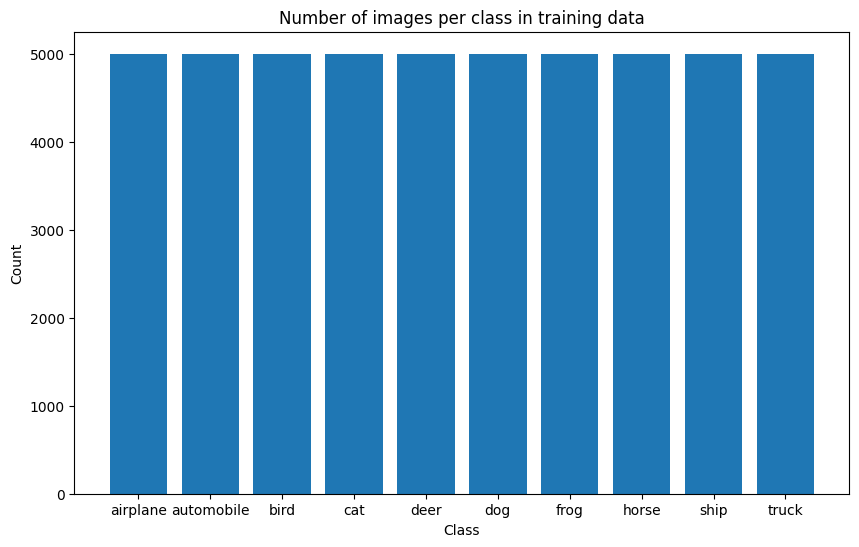

Shape of each image: (32, 32, 3)
Size of each image (in pixels): 3072
Data type of images: float64


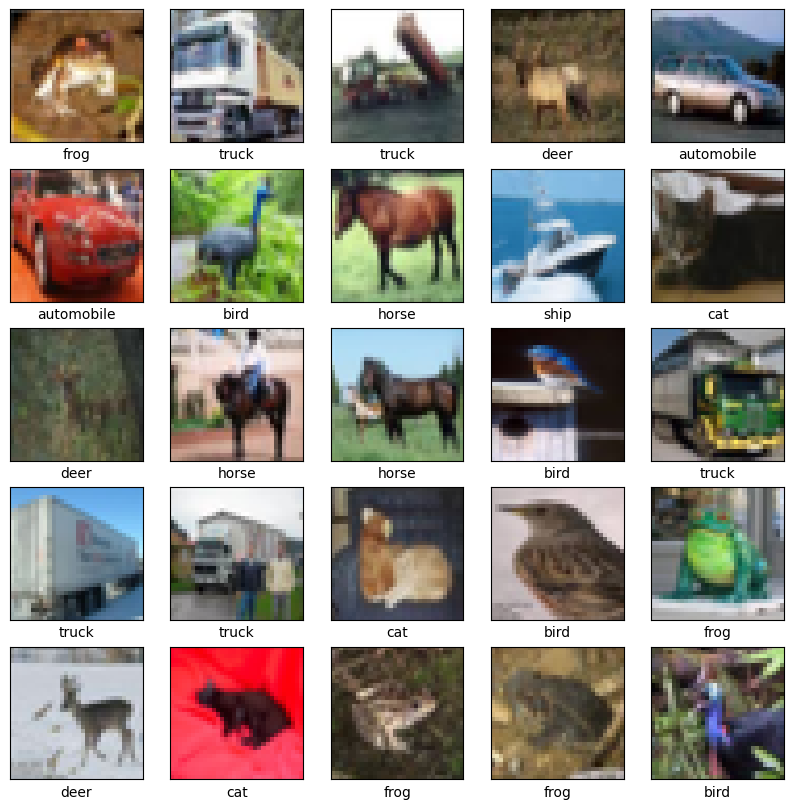

In [ ]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Load and preprocess the CIFAR10 dataset
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

# Class names for CIFAR-10 dataset
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

class_counts = np.bincount(train_labels.flatten())

# Create a DataFrame for number of images per class
class_counts_df = pd.DataFrame({
    'Class': class_names,
    'Count': class_counts
})

# Print the total number of training images
total_training_images = train_images.shape[0]
print(f"Total number of training images: {total_training_images}")

print("\n\n\n")

# Display the DataFrame
display(class_counts_df)

print("\n\n\n")
plt.figure(figsize=(10,6))
plt.bar(class_names, class_counts)
plt.title('Number of images per class in training data')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

# EDA: Show the shape, size, and type of images
print(f"Shape of each image: {train_images[0].shape}")
print(f"Size of each image (in pixels): {train_images[0].size}")
print(f"Data type of images: {train_images.dtype}")

# Visualize the first 25 images from the training set
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

### Pixel Intensity Distribution

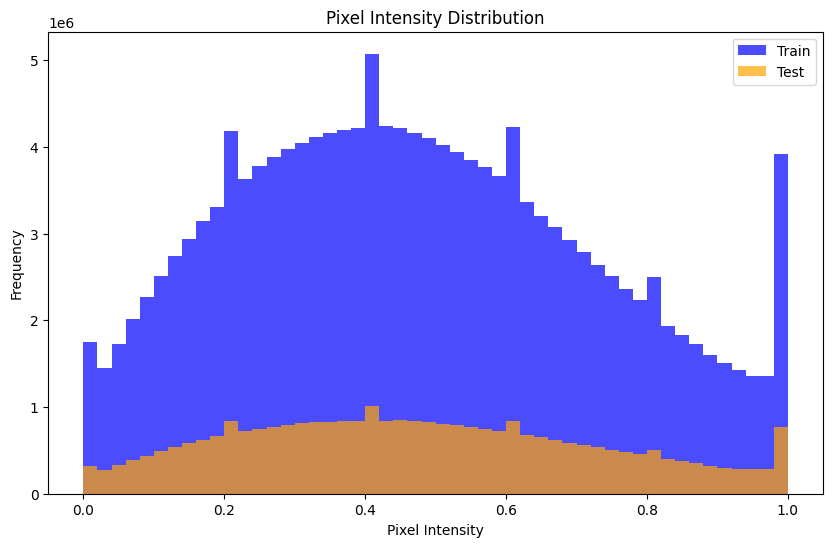

In [ ]:
# Plot the pixel intensity distribution across all images
plt.figure(figsize=(10,6))
plt.hist(train_images.flatten(), bins=50, color='blue', alpha=0.7, label='Train')
plt.hist(test_images.flatten(), bins=50, color='orange', alpha=0.7, label='Test')
plt.title('Pixel Intensity Distribution')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.legend()
plt.show()

### Channel-wise Mean and Standard Deviation

In [ ]:
# Calculate mean and std for each channel (RGB) for train and test images
mean_train = np.mean(train_images, axis=(0, 1, 2))
std_train = np.std(train_images, axis=(0, 1, 2))
mean_test = np.mean(test_images, axis=(0, 1, 2))
std_test = np.std(test_images, axis=(0, 1, 2))

# Display the results
print(f"Training data - Mean: {mean_train}, Std: {std_train}")
print(f"Test data - Mean: {mean_test}, Std: {std_test}")


Training data - Mean: [0.49139968 0.48215841 0.44653091], Std: [0.24703223 0.24348513 0.26158784]
Test data - Mean: [0.49421428 0.48513139 0.45040909], Std: [0.24665252 0.24289226 0.26159238]


### Channel-wise Mean and Standard Deviation (continued - visualization)

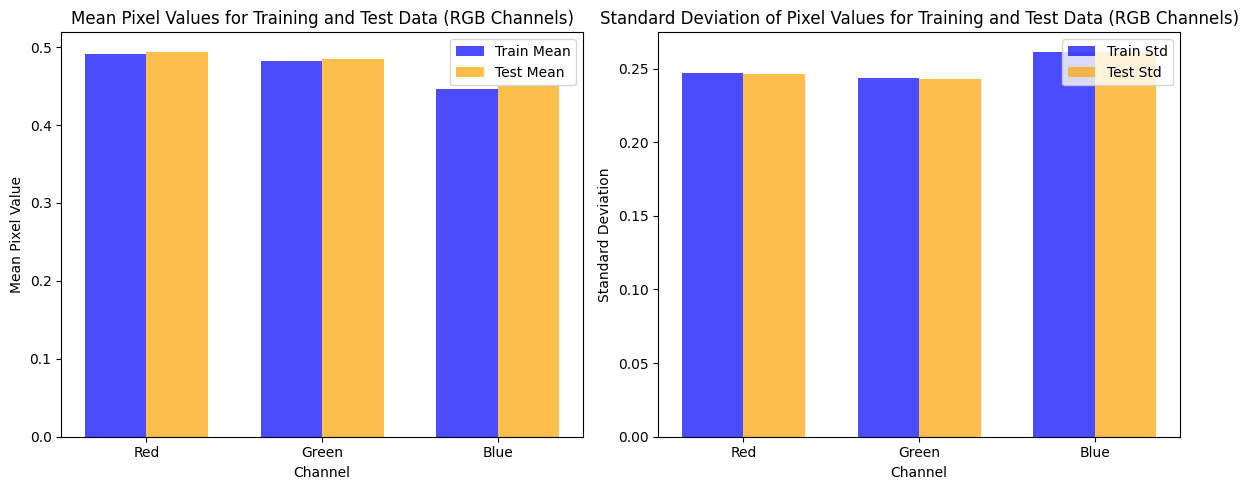

In [ ]:
# RGB channels
channels = ['Red', 'Green', 'Blue']

# Plotting mean values
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
bar_width = 0.35
index = np.arange(len(channels))

plt.bar(index, mean_train, bar_width, label='Train Mean', color='blue', alpha=0.7)
plt.bar(index + bar_width, mean_test, bar_width, label='Test Mean', color='orange', alpha=0.7)

plt.xlabel('Channel')
plt.ylabel('Mean Pixel Value')
plt.title('Mean Pixel Values for Training and Test Data (RGB Channels)')
plt.xticks(index + bar_width / 2, channels)
plt.legend()

# Plotting std values
plt.subplot(1, 2, 2)
plt.bar(index, std_train, bar_width, label='Train Std', color='blue', alpha=0.7)
plt.bar(index + bar_width, std_test, bar_width, label='Test Std', color='orange', alpha=0.7)

plt.xlabel('Channel')
plt.ylabel('Standard Deviation')
plt.title('Standard Deviation of Pixel Values for Training and Test Data (RGB Channels)')
plt.xticks(index + bar_width / 2, channels)
plt.legend()

plt.tight_layout()
plt.show()

### Calculate the brightness (mean pixel intensity) for each image

### Plot the brightness distribution for train and test sets

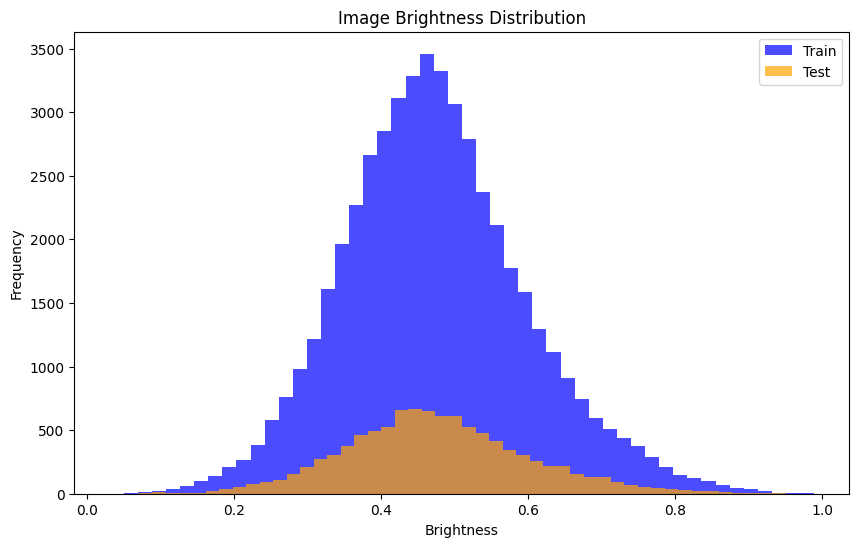

In [ ]:
# Calculate the brightness (mean pixel intensity) for each image
train_brightness = np.mean(train_images, axis=(1, 2, 3))
test_brightness = np.mean(test_images, axis=(1, 2, 3))

# Plot the brightness distribution for train and test sets
plt.figure(figsize=(10,6))
plt.hist(train_brightness, bins=50, alpha=0.7, label='Train', color='blue')
plt.hist(test_brightness, bins=50, alpha=0.7, label='Test', color='orange')
plt.title('Image Brightness Distribution')
plt.xlabel('Brightness')
plt.ylabel('Frequency')
plt.legend()
plt.show()


### Apply edge detection (using Canny) and display edge-detected images for the first image of each class

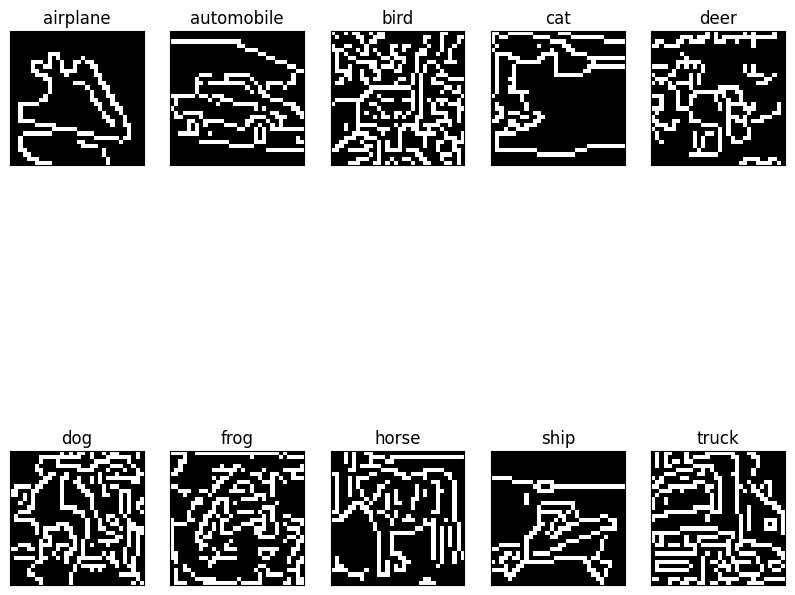

In [ ]:
import cv2

# Apply edge detection (using Canny) and display edge-detected images for the first image of each class
plt.figure(figsize=(10,10))
for i in range(10):
    class_image = train_images[train_labels.flatten() == i][0]
    edges = cv2.Canny((class_image * 255).astype(np.uint8), 100, 200)

    plt.subplot(2, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(edges, cmap='gray')
    plt.title(class_names[i])
plt.show()


### Plot the PCA result, coloring by class

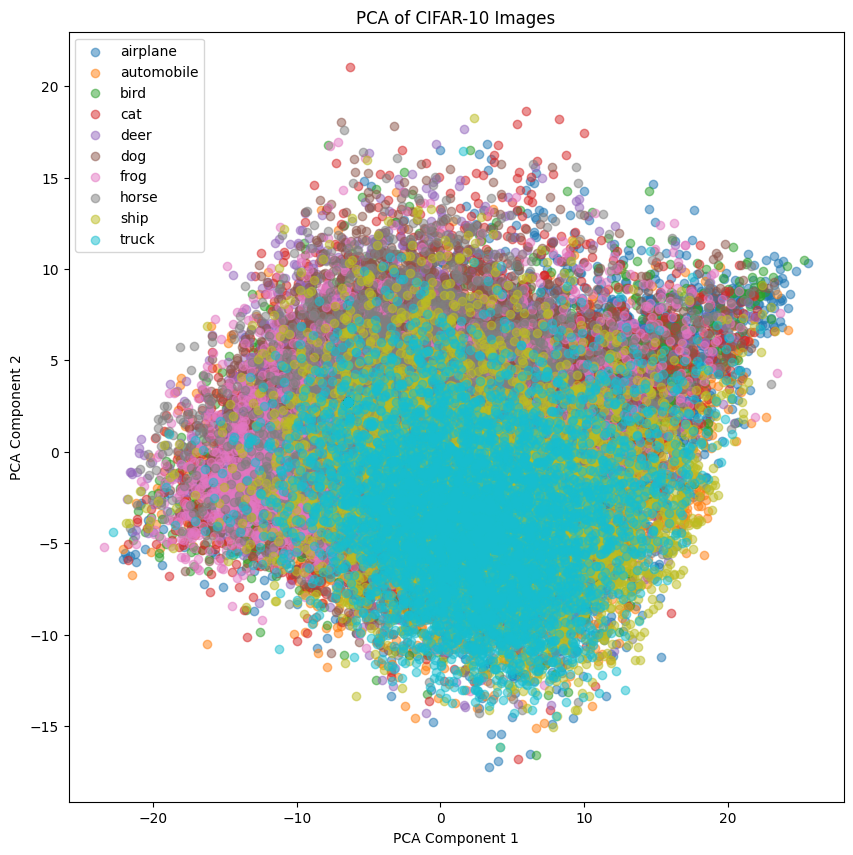

In [ ]:
from sklearn.decomposition import PCA

# Flatten images to (50000, 3072)
flat_train_images = train_images.reshape(train_images.shape[0], -1)

# Apply PCA to reduce the dataset to 2 components
pca = PCA(n_components=2)
pca_result = pca.fit_transform(flat_train_images)

# Plot the PCA result, coloring by class
plt.figure(figsize=(10, 10))
for i in range(10):
    indices = np.where(train_labels == i)
    plt.scatter(pca_result[indices, 0], pca_result[indices, 1], label=class_names[i], alpha=0.5)
plt.legend()
plt.title('PCA of CIFAR-10 Images')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()


### Plot the t-SNE to show separation of dataset in 2D

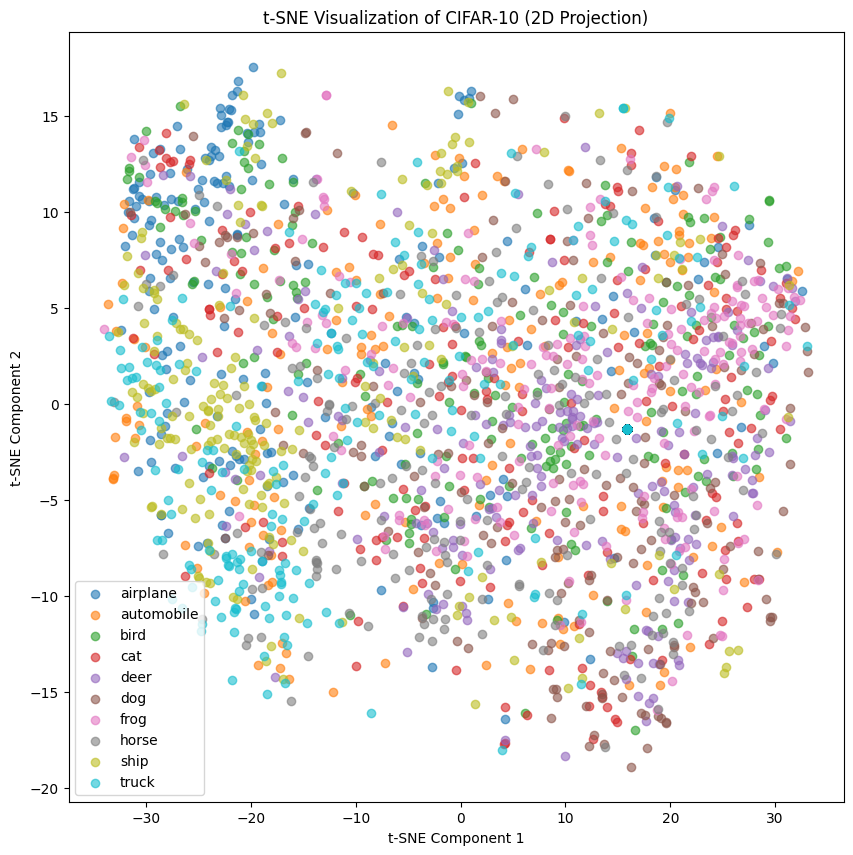

In [ ]:
from sklearn.manifold import TSNE
import numpy as np
import matplotlib.pyplot as plt

# Flatten the images from (32, 32, 3) to (3072,) for t-SNE input
flat_train_images = train_images.reshape(train_images.shape[0], -1)

# Run t-SNE to reduce to 2D
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000)
tsne_results = tsne.fit_transform(flat_train_images[:2000])  # Running on a subset for speed (e.g., first 2000 images)

# Plot the t-SNE result
plt.figure(figsize=(10, 10))
for i in range(10):
    indices = np.where(train_labels[:2000] == i)
    plt.scatter(tsne_results[indices, 0], tsne_results[indices, 1], label=class_names[i], alpha=0.6)

plt.legend()
plt.title('t-SNE Visualization of CIFAR-10 (2D Projection)')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()


# Test data EDA:

        Class  Count
0    airplane   1000
1  automobile   1000
2        bird   1000
3         cat   1000
4        deer   1000
5         dog   1000
6        frog   1000
7       horse   1000
8        ship   1000
9       truck   1000
Shape of each test image: (32, 32, 3)
Size of each test image (in pixels): 3072
Data type of test images: float64


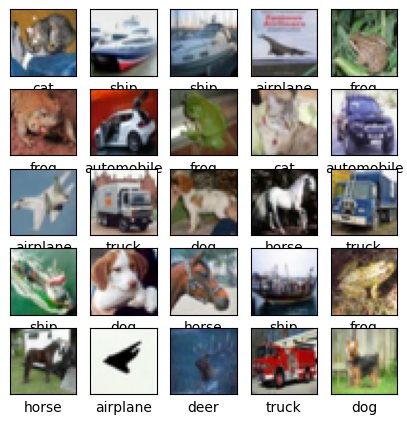

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Class names for CIFAR-10 dataset
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# EDA: Count the number of images for each class in the test set
test_class_counts = np.bincount(test_labels.flatten())

# Create a DataFrame for number of test images per class
test_class_counts_df = pd.DataFrame({
    'Class': class_names,
    'Count': test_class_counts
})

# Display the DataFrame for the test set
print(test_class_counts_df)

# EDA: Show the shape, size, and type of test images
print(f"Shape of each test image: {test_images[0].shape}")
print(f"Size of each test image (in pixels): {test_images[0].size}")
print(f"Data type of test images: {test_images.dtype}")

# Visualize the first 25 images from the test set
plt.figure(figsize=(5,5))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i])
    plt.xlabel(class_names[test_labels[i][0]])
plt.show()


---
# Model Building

This section covers the construction of Convolutional Neural Networks (CNNs) to classify images in the CIFAR-10 dataset. CNNs are highly effective for image recognition tasks as they leverage the spatial structure of data by learning local features through convolutional layers. The CNN architecture used in this project includes several key components:

- **Convolutional Layers**: Capture local patterns in images, such as edges and textures, and build hierarchical feature representations.
- **Batch Normalization**: Applied after convolutional layers to stabilize and accelerate the training process by normalizing intermediate activations.
- **Dropout**: Incorporated to prevent overfitting by randomly deactivating neurons during training, improving the model's generalization to unseen data.
- **Pooling Layers**: Reduce the dimensionality of the feature maps while retaining essential information, allowing the model to focus on high-level features.

A baseline CNN model was trained and further enhanced using **Transfer Learning** with pre-trained models such as ResNet18 and Xception. These models were fine-tuned on the CIFAR-10 dataset by freezing the base layers and adding custom layers for classification, benefiting from the feature extraction capabilities of larger, pre-trained models.


---

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 16, 16, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 8, 8, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 8, 8, 128)           │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 8, 8, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 4, 4, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 4, 4, 256)           │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 4, 4, 256)           │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 4, 4, 256)           │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 1,520,490 (5.80 MB)

 Trainable params: 1,518,314 (5.79 MB)

 Non-trainable params: 2,176 (8.50 KB)

Epoch 1/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 31s 10ms/step - accuracy: 0.3212 - loss: 1.8314 - val_accuracy: 0.5517 - val_loss: 1.2686
Epoch 2/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.5462 - loss: 1.2971 - val_accuracy: 0.5252 - val_loss: 1.3570
Epoch 3/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6284 - loss: 1.0909 - val_accuracy: 0.6968 - val_loss: 0.8655
Epoch 4/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.6766 - loss: 0.9678 - val_accuracy: 0.4656 - val_loss: 2.2144
Epoch 5/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7030 - loss: 0.8917 - val_accuracy: 0.7365 - val_loss: 0.7768
Epoch 6/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7380 - loss: 0.7987 - val_accuracy: 0.7496 - val_loss: 0.7347
Epoch 7/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7543 - loss: 0.7525 - val_accuracy: 0.7363 - val_loss: 0.8002
Epoch 8/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7739 - loss: 0.6854 

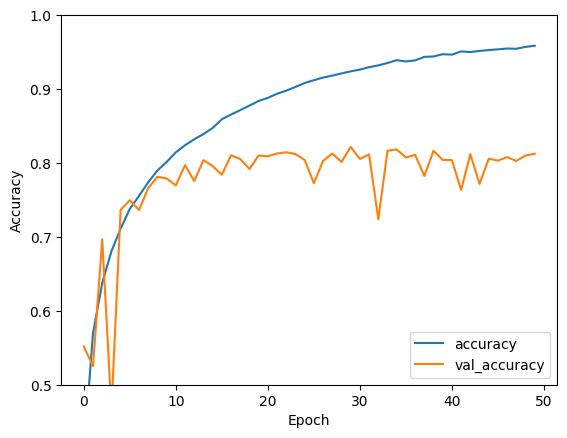

313/313 - 1s - 2ms/step - accuracy: 0.8125 - loss: 0.8501
Test accuracy: 0.8125


In [ ]:
# Create the CNN model
model = models.Sequential()

# Define the input using Input() layer
model.add(layers.Input(shape=(32, 32, 3)))

# First convolutional block
model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())  #  normalization
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))  #  dropout to prevent overfitting

# Second convolutional block
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())  # normalization
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))  # dropout to prevent overfitting

# Third convolutional block
model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())  #  normalization
model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())  # normalization
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))  #  dropout to prevent overfitting

# Fourth convolutional block
model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())  # normalization
model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())  # normalization
model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())  # normalization

# Fifth convolutional block
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())  # normalization
model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())  #  normalization

model.add(layers.GlobalAveragePooling2D())

# Dense layers
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.5))  # dropout for regularization
model.add(layers.Dense(10))

# Display the model architecture
model.summary()

# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Train the model
history = model.fit(train_images, train_labels, epochs=50,
                    validation_data=(test_images, test_labels))

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.show()

# Evaluate the model on test data
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f'Test accuracy: {test_acc}')


# try pre-trained model here...
#

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional_28"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1             │ (None, 32, 32, 3)      │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 38, 38, 3)      │              0 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 16, 16, 64)     │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 16, 16, 64)     │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 16, 16, 64)     │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 18, 18, 64)     │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 8, 8, 64)       │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 8, 8, 64)       │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 8, 8, 64)       │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 8, 8, 64)       │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 8, 8, 64)       │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 8, 8, 64)       │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 8, 8, 64)       │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 8, 8, 256)      │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, 8, 8, 256)      │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)             

 Total params: 25,610,666 (97.70 MB)

 Trainable params: 2,020,970 (7.71 MB)

 Non-trainable params: 23,589,696 (89.99 MB)

Epoch 1/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 47s 18ms/step - accuracy: 0.1377 - loss: 2.6208 - val_accuracy: 0.1626 - val_loss: 2.4119
Epoch 2/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.2247 - loss: 2.1121 - val_accuracy: 0.1194 - val_loss: 3.3106
Epoch 3/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.2769 - loss: 1.9798 - val_accuracy: 0.1894 - val_loss: 2.3952
Epoch 4/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.3086 - loss: 1.9155 - val_accuracy: 0.2482 - val_loss: 2.0190
Epoch 5/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.3277 - loss: 1.8780 - val_accuracy: 0.3133 - val_loss: 1.8585
Epoch 6/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.3367 - loss: 1.8556 - val_accuracy: 0.3165 - val_loss: 1.8670
Epoch 7/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.3418 - loss: 1.8325 - val_accuracy: 0.1315 - val_loss: 3.6094
Epoch 8/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.3418 - loss: 

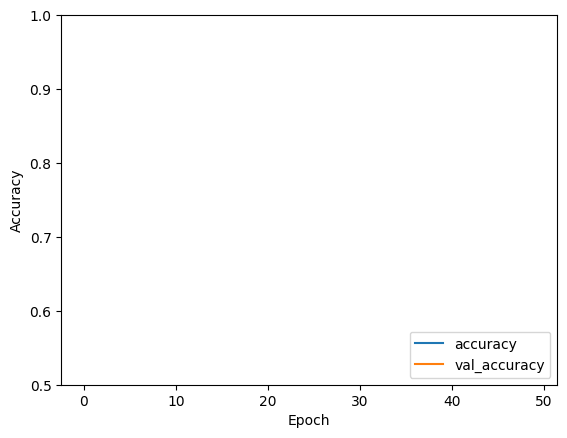

313/313 - 2s - 6ms/step - accuracy: 0.2540 - loss: 2.0729
Test accuracy: 0.2540000081062317


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import ResNet50, EfficientNetB0, InceptionV3, Xception
import numpy as np
import pandas as pd
from IPython.display import display

# Load the CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()

# Normalize the image values to [0, 1]
train_images, test_images = train_images / 255.0, test_images / 255.0

# Define input sizes for each model
input_sizes = {
    "ResNet50": (75, 75),
    "EfficientNetB0": (75, 75),
    "InceptionV3": (75, 75),
    "Xception": (75, 75)
}

# Pretrained models dictionary
pretrained_models = {
    "ResNet50": ResNet50,
    "EfficientNetB0": EfficientNetB0,
    "InceptionV3": InceptionV3,
    "Xception": Xception
}

# Function to resize images based on the model's required input size
def resize_images(images, size):
    return np.array([tf.image.resize(img, size) for img in images])

# Function to build model dynamically
def build_model(base_model, input_shape):
    base_model = base_model(weights='imagenet', include_top=False, input_shape=input_shape)
    base_model.trainable = False  # Freeze the pre-trained layers

    # Custom top layers
    x = base_model.output
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(64, activation='relu')(x)
    x = layers.Dropout(0.5)(x)
    predictions = layers.Dense(10, activation='softmax')(x)  # CIFAR-10 has 10 classes

    model = models.Model(inputs=base_model.input, outputs=predictions)

    # Compile the model
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    return model

# Function to perform grid search over models
def grid_search(models_dict, input_sizes, train_images, train_labels, test_images, test_labels):
    results = []

    for model_name, model_fn in models_dict.items():
        print(f"Training with {model_name}...")

        # Resize the images based on the model's input size
        input_size = input_sizes[model_name]
        train_images_resized = resize_images(train_images, input_size)
        test_images_resized = resize_images(test_images, input_size)

        # Build the model
        model = build_model(model_fn, input_shape=(input_size[0], input_size[1], 3))

        # Train the model
        history = model.fit(train_images_resized, train_labels, epochs=50,  # Use fewer epochs for quick evaluation
                            validation_data=(test_images_resized, test_labels), verbose=2)

        # Get validation accuracy
        val_accuracy = np.max(history.history['val_accuracy'])
        print(f"{model_name} validation accuracy: {val_accuracy}")

        # Store the model name and validation accuracy
        results.append((model_name, val_accuracy))

    return results

# Perform grid search over pre-trained models and get the results
results = grid_search(pretrained_models, input_sizes, train_images, train_labels, test_images, test_labels)

# Convert the results to a DataFrame
results_df = pd.DataFrame(results, columns=["Model Name", "Validation Accuracy"])

# Sort the DataFrame by Validation Accuracy in descending order
results_df = results_df.sort_values(by="Validation Accuracy", ascending=False)

# Display the DataFrame
display(results_df)

# Now, find the best model based on validation accuracy
best_model_row = results_df.iloc[0]
best_model_name = best_model_row['Model Name']
best_validation_accuracy = best_model_row['Validation Accuracy']

print(f"\nBest model: {best_model_name} with validation accuracy: {best_validation_accuracy}")


Training with ResNet50...
Epoch 1/50
1563/1563 - 36s - 23ms/step - accuracy: 0.1367 - loss: 2.2851 - val_accuracy: 0.1995 - val_loss: 2.2530
Epoch 2/50
1563/1563 - 13s - 8ms/step - accuracy: 0.1742 - loss: 2.2351 - val_accuracy: 0.2362 - val_loss: 2.1936
Epoch 3/50
1563/1563 - 13s - 8ms/step - accuracy: 0.2000 - loss: 2.1821 - val_accuracy: 0.2570 - val_loss: 2.1395
Epoch 4/50
1563/1563 - 13s - 8ms/step - accuracy: 0.2176 - loss: 2.1376 - val_accuracy: 0.2780 - val_loss: 2.0843
Epoch 5/50
1563/1563 - 13s - 8ms/step - accuracy: 0.2283 - loss: 2.1006 - val_accuracy: 0.2944 - val_loss: 2.0479
Epoch 6/50
1563/1563 - 13s - 8ms/step - accuracy: 0.2430 - loss: 2.0704 - val_accuracy: 0.2958 - val_loss: 2.0114
Epoch 7/50
1563/1563 - 13s - 8ms/step - accuracy: 0.2467 - loss: 2.0479 - val_accuracy: 0.3037 - val_loss: 1.9896
Epoch 8/50
1563/1563 - 13s - 8ms/step - accuracy: 0.2540 - loss: 2.0290 - val_accuracy: 0.3103 - val_loss: 1.9695
Epoch 9/50
1563/1563 - 13s - 8ms/step - accuracy: 0.2593 - lo

,Model Name,Validation Accuracy
3,Xception,0.7503
2,InceptionV3,0.6327
0,ResNet50,0.3714
1,EfficientNetB0,0.1000



Best model: Xception with validation accuracy: 0.7502999901771545


# try another model here and train on horizontal flipping:

# Utilized horizontal flipping as discussed in this article:
##### Keller, J. (2024). 94% on CIFAR-10 in 3.29 Seconds on a Single GPU.

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

# Define the transformation with derandomized horizontal flipping
transform_train = transforms.Compose([
    transforms.RandomHorizontalFlip(p=0.5),  # Flip with a fixed probability
    transforms.RandomCrop(32, padding=4),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

# Load the CIFAR-10 dataset
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform_train)
trainloader = DataLoader(trainset, batch_size=128, shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform_test)
testloader = DataLoader(testset, batch_size=100, shuffle=False, num_workers=2)

# Define a simple model (e.g., ResNet)
from torchvision.models import resnet18
model = resnet18(num_classes=10)

# Set the device (ensure you're using an A100 GPU)
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model = model.to(device)

# Define optimizer and loss function
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.1, momentum=0.9, weight_decay=5e-4)
scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=200)

# Training loop
def train(epoch):
    model.train()
    running_loss = 0.0
    for batch_idx, (inputs, targets) in enumerate(trainloader):
        inputs, targets = inputs.to(device), targets.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    print(f'Epoch {epoch}, Loss: {running_loss/len(trainloader)}')

# Testing loop
def test(epoch):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, targets in testloader:
            inputs, targets = inputs.to(device), targets.to(device)
            outputs = model(inputs)
            _, predicted = outputs.max(1)
            total += targets.size(0)
            correct += predicted.eq(targets).sum().item()
    print(f'Accuracy: {100. * correct / total}')

# Main training and testing process
for epoch in range(200):
    train(epoch)
    test(epoch)
    scheduler.step()

# Save the model checkpoint
torch.save(model.state_dict(), 'cifar10_resnet.pth')


100%|██████████| 170498071/170498071 [00:03<00:00, 43639973.59it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


Epoch 0, Loss: 1.974699157278251
Accuracy: 43.45
Epoch 1, Loss: 1.4872632355946105
Accuracy: 47.0
Epoch 2, Loss: 1.3031567853430044
Accuracy: 57.37
Epoch 3, Loss: 1.1512234874088745
Accuracy: 57.94
Epoch 4, Loss: 1.0555437329175221
Accuracy: 65.04
Epoch 5, Loss: 0.9791480212870156
Accuracy: 66.48
Epoch 6, Loss: 0.9294449926337318
Accuracy: 67.71
Epoch 7, Loss: 0.8847360958528641
Accuracy: 67.07
Epoch 8, Loss: 0.8507171308293062
Accuracy: 72.24
Epoch 9, Loss: 0.8287600836790431
Accuracy: 71.44
Epoch 10, Loss: 0.8038817892598984
Accuracy: 71.37
Epoch 11, Loss: 0.7854241573292277
Accuracy: 69.11
Epoch 12, Loss: 0.7747650050446201
Accuracy: 67.8
Epoch 13, Loss: 0.7616513051340342
Accuracy: 72.75
Epoch 14, Loss: 0.7523383723043114
Accuracy: 73.52
Epoch 15, Loss: 0.7423273717503414
Accuracy: 71.77
Epoch 16, Loss: 0.7369619541613343
Accuracy: 69.72
Epoch 17, Loss: 0.7226589261875738
Accuracy: 71.57
Epoch 18, Loss: 0.7200172426907913
Accuracy: 73.59
Epoch 19, Loss: 0.7090159271989027
Accuracy:

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt

# Prepare tensors here...
train_images_tensor = torch.tensor(train_images, dtype=torch.float32).permute(0, 3, 1, 2)
test_images_tensor = torch.tensor(test_images, dtype=torch.float32).permute(0, 3, 1, 2)

# Scale images from [0, 1] to [-1, 1]
train_images_tensor = (train_images_tensor - 0.5) / 0.5
test_images_tensor = (test_images_tensor - 0.5) / 0.5

# Ensure labels are in long type
train_labels_tensor = torch.tensor(train_labels, dtype=torch.long).squeeze()
test_labels_tensor = torch.tensor(test_labels, dtype=torch.long).squeeze()

# Define the transformation with horizontal flip and random crop for training data
transform_train = transforms.Compose([
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomCrop(32, padding=4),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

# Apply transformations to the training dataset
train_images_tensor = transform_train(train_images_tensor)

# Normalize the test data (no augmentation)
test_images_tensor = transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))(test_images_tensor)

# Create TensorDataset and DataLoader
train_dataset = TensorDataset(train_images_tensor, train_labels_tensor)
test_dataset = TensorDataset(test_images_tensor, test_labels_tensor)

trainloader = DataLoader(train_dataset, batch_size=128, shuffle=True, num_workers=2)
testloader = DataLoader(test_dataset, batch_size=100, shuffle=False, num_workers=2)

# Define a simple model (e.g., ResNet)
from torchvision.models import resnet18
model = resnet18(num_classes=10)

# Set the device (use GPU if available)
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model = model.to(device)

# Define optimizer and loss function
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.1, momentum=0.9, weight_decay=5e-4)
scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=200)

# Lists to store loss and accuracy for plotting
train_losses = []
test_accuracies = []

# Training loop
def train(epoch):
    model.train()
    running_loss = 0.0
    for batch_idx, (inputs, targets) in enumerate(trainloader):
        inputs, targets = inputs.to(device), targets.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    train_losses.append(running_loss / len(trainloader))
    print(f'Epoch {epoch}, Loss: {running_loss/len(trainloader)}')

# Testing loop
def test(epoch):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, targets in testloader:
            inputs, targets = inputs.to(device), targets.to(device)
            outputs = model(inputs)
            _, predicted = outputs.max(1)
            total += targets.size(0)
            correct += predicted.eq(targets).sum().item()
    accuracy = 100. * correct / total
    test_accuracies.append(accuracy)
    print(f'Accuracy: {accuracy}%')

# Main training and testing process
for epoch in range(500):
    train(epoch)
    test(epoch)
    scheduler.step()



Epoch 0, Loss: 1.9262835528234692
Accuracy: 46.39%
Epoch 1, Loss: 1.291000120170281
Accuracy: 49.05%
Epoch 2, Loss: 1.0834678062392622
Accuracy: 56.34%
Epoch 3, Loss: 0.935919786505687
Accuracy: 59.99%
Epoch 4, Loss: 0.8410881747065297
Accuracy: 57.72%
Epoch 5, Loss: 0.7555868871071759
Accuracy: 66.52%
Epoch 6, Loss: 0.700191015325239
Accuracy: 65.95%
Epoch 7, Loss: 0.6551114531124339
Accuracy: 64.39%
Epoch 8, Loss: 0.6155810307358842
Accuracy: 69.58%
Epoch 9, Loss: 0.5835925284249094
Accuracy: 66.86%
Epoch 10, Loss: 0.5574782551706904
Accuracy: 68.86%
Epoch 11, Loss: 0.5244942325003007
Accuracy: 67.53%
Epoch 12, Loss: 0.5049656159280206
Accuracy: 68.75%
Epoch 13, Loss: 0.4882439249921638
Accuracy: 69.23%
Epoch 14, Loss: 0.46551210629513196
Accuracy: 64.51%
Epoch 15, Loss: 0.45883576179404395
Accuracy: 64.81%
Epoch 16, Loss: 0.44247006866938016
Accuracy: 70.04%
Epoch 17, Loss: 0.42734038117139234
Accuracy: 69.01%
Epoch 18, Loss: 0.4245433157590954
Accuracy: 68.05%
Epoch 19, Loss: 0.415

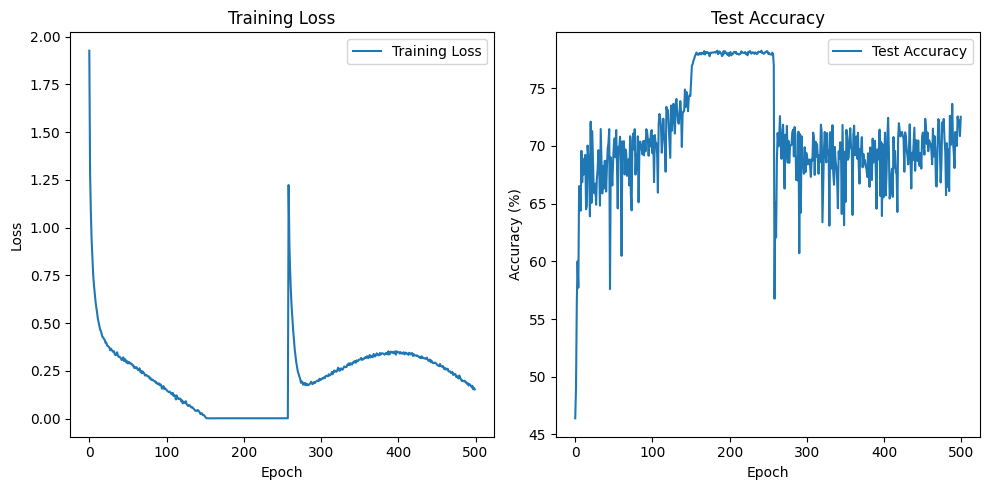

In [ ]:
# Plotting the results
plt.figure(figsize=(10, 5))

# Plot the training loss
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss')
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot the test accuracy
plt.subplot(1, 2, 2)
plt.plot(test_accuracies, label='Test Accuracy')
plt.title('Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
# Save the model checkpoint
torch.save(model.state_dict(), '/content/drive/MyDrive/Deep_Learning/Image_Classification/cifar10_resnet_V2.pth')

# Run grid search here:

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt
import itertools

# Convert the images to PyTorch tensors and permute dimensions from NHWC to NCHW
train_images_tensor = torch.tensor(train_images, dtype=torch.float32).permute(0, 3, 1, 2)  # NCHW format
test_images_tensor = torch.tensor(test_images, dtype=torch.float32).permute(0, 3, 1, 2)    # NCHW format

# Scale images from [0, 1] to [-1, 1]
train_images_tensor = (train_images_tensor - 0.5) / 0.5
test_images_tensor = (test_images_tensor - 0.5) / 0.5

# Ensure labels are in long type
train_labels_tensor = torch.tensor(train_labels, dtype=torch.long).squeeze()
test_labels_tensor = torch.tensor(test_labels, dtype=torch.long).squeeze()

# Define the transformation with horizontal flip and random crop for training data
transform_train = transforms.Compose([
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomCrop(32, padding=4),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

# Apply transformations to the training dataset
train_images_tensor = transform_train(train_images_tensor)

# Normalize the test data (no augmentation)
test_images_tensor = transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))(test_images_tensor)

# Create TensorDataset and DataLoader (batch size will be defined dynamically)
def get_dataloaders(batch_size):
    train_dataset = TensorDataset(train_images_tensor, train_labels_tensor)
    test_dataset = TensorDataset(test_images_tensor, test_labels_tensor)

    trainloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=2)
    testloader = DataLoader(test_dataset, batch_size=100, shuffle=False, num_workers=2)

    return trainloader, testloader

# Define a simple model (e.g., ResNet)
from torchvision.models import resnet18

# Training loop
def train(model, optimizer, criterion, trainloader, device):
    model.train()
    running_loss = 0.0
    for batch_idx, (inputs, targets) in enumerate(trainloader):
        inputs, targets = inputs.to(device), targets.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    return running_loss / len(trainloader)

# Testing loop
def test(model, criterion, testloader, device):
    model.eval()
    correct = 0
    total = 0
    running_loss = 0.0
    with torch.no_grad():
        for inputs, targets in testloader:
            inputs, targets = inputs.to(device), targets.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            _, predicted = outputs.max(1)
            total += targets.size(0)
            correct += predicted.eq(targets).sum().item()
            running_loss += loss.item()
    accuracy = 100. * correct / total
    return accuracy, running_loss / len(testloader)

# Grid search over hyperparameters
def grid_search():
    device = 'cuda' if torch.cuda.is_available() else 'cpu'

    # Define hyperparameter grid
    lrs = [0.001, 0.01, 0.1]
    momentums = [0.8, 0.9]
    weight_decays = [0, 1e-4]
    batch_sizes = [64, 128]
    optimizers = ['SGD', 'Adam']

    best_accuracy = 0
    best_params = None
    best_model_state = None

    # Iterate through all combinations of hyperparameters
    for lr, momentum, weight_decay, batch_size, optimizer_type in itertools.product(lrs, momentums, weight_decays, batch_sizes, optimizers):
        print(f"Testing hyperparameters: lr={lr}, momentum={momentum}, weight_decay={weight_decay}, batch_size={batch_size}, optimizer={optimizer_type}")

        # Get data loaders for this batch size
        trainloader, testloader = get_dataloaders(batch_size)

        # Initialize model and move to device
        model = resnet18(num_classes=10).to(device)
        criterion = nn.CrossEntropyLoss()

        # Initialize optimizer
        if optimizer_type == 'SGD':
            optimizer = optim.SGD(model.parameters(), lr=lr, momentum=momentum, weight_decay=weight_decay)
        elif optimizer_type == 'Adam':
            optimizer = optim.Adam(model.parameters(), lr=lr, weight_decay=weight_decay)

        # Training loop for 10 epochs (can be adjusted)
        for epoch in range(10):
            train_loss = train(model, optimizer, criterion, trainloader, device)
            test_accuracy, test_loss = test(model, criterion, testloader, device)
            print(f"Epoch {epoch+1}: train_loss={train_loss:.4f}, test_accuracy={test_accuracy:.2f}%, test_loss={test_loss:.4f}")

        # Save best model based on accuracy
        if test_accuracy > best_accuracy:
            best_accuracy = test_accuracy
            best_params = (lr, momentum, weight_decay, batch_size, optimizer_type)
            best_model_state = model.state_dict()

    # Output the best hyperparameters
    print(f"Best hyperparameters: lr={best_params[0]}, momentum={best_params[1]}, weight_decay={best_params[2]}, batch_size={best_params[3]}, optimizer={best_params[4]}")
    print(f"Best accuracy: {best_accuracy}%")

    # Save the best model
    torch.save(best_model_state, 'best_cifar10_resnet.pth')

# Run grid search
grid_search()


Testing hyperparameters: lr=0.001, momentum=0.8, weight_decay=0, batch_size=64, optimizer=SGD
Epoch 1: train_loss=1.6745, test_accuracy=39.72%, test_loss=1.6896
Epoch 2: train_loss=1.3447, test_accuracy=47.51%, test_loss=1.4405
Epoch 3: train_loss=1.1737, test_accuracy=48.68%, test_loss=1.4193
Epoch 4: train_loss=1.0321, test_accuracy=46.12%, test_loss=1.5778
Epoch 5: train_loss=0.9042, test_accuracy=52.67%, test_loss=1.3869
Epoch 6: train_loss=0.7846, test_accuracy=51.85%, test_loss=1.4149
Epoch 7: train_loss=0.6718, test_accuracy=53.09%, test_loss=1.4655
Epoch 8: train_loss=0.5616, test_accuracy=51.44%, test_loss=1.5637
Epoch 9: train_loss=0.4558, test_accuracy=52.92%, test_loss=1.5844
Epoch 10: train_loss=0.3727, test_accuracy=50.91%, test_loss=1.8034
Testing hyperparameters: lr=0.001, momentum=0.8, weight_decay=0, batch_size=64, optimizer=Adam
Epoch 1: train_loss=1.4057, test_accuracy=45.00%, test_loss=1.5785
Epoch 2: train_loss=1.0155, test_accuracy=59.30%, test_loss=1.1654
Epoch 

# try a version of Xception here and do grid search to find best hyperperamters

In [ ]:
!pip install timm


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.4/42.4 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 71.8 MB/s eta 0:00:00


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, TensorDataset
import itertools
import timm  # Import timm for Xception

# Convert the images to PyTorch tensors and permute dimensions from NHWC to NCHW
train_images_tensor = torch.tensor(train_images, dtype=torch.float32).permute(0, 3, 1, 2)  # NCHW format
test_images_tensor = torch.tensor(test_images, dtype=torch.float32).permute(0, 3, 1, 2)    # NCHW format

# Scale images from [0, 1] to [-1, 1]
train_images_tensor = (train_images_tensor - 0.5) / 0.5
test_images_tensor = (test_images_tensor - 0.5) / 0.5

# Ensure labels are in long type
train_labels_tensor = torch.tensor(train_labels, dtype=torch.long).squeeze()  # Remove extra dimensions
test_labels_tensor = torch.tensor(test_labels, dtype=torch.long).squeeze()

# Define the transformation with horizontal flip and random crop for training data
transform_train = transforms.Compose([
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomCrop(32, padding=4),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # Same normalization as the working code
])

# Apply transformations to the training dataset
train_images_tensor = transform_train(train_images_tensor)

# Normalize the test data (no augmentation)
test_images_tensor = transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))(test_images_tensor)

# Create TensorDataset and DataLoader (batch size will be defined dynamically)
def get_dataloaders(batch_size):
    train_dataset = TensorDataset(train_images_tensor, train_labels_tensor)
    test_dataset = TensorDataset(test_images_tensor, test_labels_tensor)

    trainloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=2)
    testloader = DataLoader(test_dataset, batch_size=100, shuffle=False, num_workers=2)

    return trainloader, testloader

# Training loop
def train(model, optimizer, criterion, trainloader, device):
    model.train()
    running_loss = 0.0
    for batch_idx, (inputs, targets) in enumerate(trainloader):
        inputs, targets = inputs.to(device), targets.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    return running_loss / len(trainloader)

# Testing loop
def test(model, criterion, testloader, device):
    model.eval()
    correct = 0
    total = 0
    running_loss = 0.0
    with torch.no_grad():
        for inputs, targets in testloader:
            inputs, targets = inputs.to(device), targets.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            _, predicted = outputs.max(1)
            total += targets.size(0)
            correct += predicted.eq(targets).sum().item()
            running_loss += loss.item()
    accuracy = 100. * correct / total
    return accuracy, running_loss / len(testloader)

# Grid search over hyperparameters
def grid_search():
    device = 'cuda' if torch.cuda.is_available() else 'cpu'

    # Define hyperparameter grid
    #lrs = [0.001, 0.01, 0.1]
    #momentums = [0.8, 0.9]
    #weight_decays = [0, 1e-4]
    #batch_sizes = [64, 128]
    #optimizers = ['SGD', 'Adam']

    # Set variables to the best found hyperparameters
    lrs = [0.001]         # Only the best learning rate
    momentums = [0.8]      # Only the best momentum
    weight_decays = [0]    # Only the best weight decay
    batch_sizes = [64]     # Only the best batch size
    optimizers = ['Adam']  # Only the best optimizer

    best_accuracy = 0
    best_params = None
    best_model_state = None

    # Iterate through all combinations of hyperparameters
    for lr, momentum, weight_decay, batch_size, optimizer_type in itertools.product(lrs, momentums, weight_decays, batch_sizes, optimizers):
        print(f"Testing hyperparameters: lr={lr}, momentum={momentum}, weight_decay={weight_decay}, batch_size={batch_size}, optimizer={optimizer_type}")

        # Get data loaders for this batch size
        trainloader, testloader = get_dataloaders(batch_size)

        # Initialize Xception model and move to device
        model = timm.create_model('xception', pretrained=True, num_classes=10).to(device)
        criterion = nn.CrossEntropyLoss()

        # Initialize optimizer
        if optimizer_type == 'SGD':
            optimizer = optim.SGD(model.parameters(), lr=lr, momentum=momentum, weight_decay=weight_decay)
        elif optimizer_type == 'Adam':
            optimizer = optim.Adam(model.parameters(), lr=lr, weight_decay=weight_decay)

        # Training loop for 10 epochs (can be adjusted)
        for epoch in range(10):
            train_loss = train(model, optimizer, criterion, trainloader, device)
            test_accuracy, test_loss = test(model, criterion, testloader, device)
            print(f"Epoch {epoch+1}: train_loss={train_loss:.4f}, test_accuracy={test_accuracy:.2f}%, test_loss={test_loss:.4f}")

        # Save best model based on accuracy
        if test_accuracy > best_accuracy:
            best_accuracy = test_accuracy
            best_params = (lr, momentum, weight_decay, batch_size, optimizer_type)
            best_model_state = model.state_dict()

    # Output the best hyperparameters
    print(f"Best hyperparameters: lr={best_params[0]}, momentum={best_params[1]}, weight_decay={best_params[2]}, batch_size={best_params[3]}, optimizer={best_params[4]}")
    print(f"Best accuracy: {best_accuracy}%")

    return best_params, best_model_state

# Run grid search and get best parameters and model state
best_params, best_model_state = grid_search()


Testing hyperparameters: lr=0.001, momentum=0.8, weight_decay=0, batch_size=64, optimizer=Adam
Epoch 1: train_loss=1.2232, test_accuracy=67.52%, test_loss=0.9594
Epoch 2: train_loss=0.6416, test_accuracy=73.47%, test_loss=0.7909
Epoch 3: train_loss=0.4761, test_accuracy=78.22%, test_loss=0.6534
Epoch 4: train_loss=0.3668, test_accuracy=78.73%, test_loss=0.6506
Epoch 5: train_loss=0.2808, test_accuracy=76.91%, test_loss=0.7289
Epoch 6: train_loss=0.2193, test_accuracy=79.57%, test_loss=0.6647
Epoch 7: train_loss=0.1782, test_accuracy=78.91%, test_loss=0.7339
Epoch 8: train_loss=0.1470, test_accuracy=78.18%, test_loss=0.7824
Epoch 9: train_loss=0.1224, test_accuracy=79.06%, test_loss=0.7286
Epoch 10: train_loss=0.0954, test_accuracy=78.95%, test_loss=0.8440
Best hyperparameters: lr=0.001, momentum=0.8, weight_decay=0, batch_size=64, optimizer=Adam
Best accuracy: 78.95%


# Run same model above with best parameters found for 500 epochs:

Epoch 1/500: train_loss=0.1075, test_accuracy=78.57%, test_loss=0.8143
Epoch 2/500: train_loss=0.0810, test_accuracy=78.22%, test_loss=0.9142
Epoch 3/500: train_loss=0.0827, test_accuracy=79.43%, test_loss=0.8933
Epoch 4/500: train_loss=0.0728, test_accuracy=79.00%, test_loss=0.9348
Epoch 5/500: train_loss=0.0704, test_accuracy=78.10%, test_loss=0.9338
Epoch 6/500: train_loss=0.0657, test_accuracy=78.79%, test_loss=0.8712
Epoch 7/500: train_loss=0.0601, test_accuracy=80.31%, test_loss=0.8397
Epoch 8/500: train_loss=0.0560, test_accuracy=78.64%, test_loss=0.9194
Epoch 9/500: train_loss=0.0636, test_accuracy=79.09%, test_loss=0.8890
Epoch 10/500: train_loss=0.0481, test_accuracy=79.59%, test_loss=0.8946
Epoch 11/500: train_loss=0.0444, test_accuracy=79.20%, test_loss=0.9381
Epoch 12/500: train_loss=0.0480, test_accuracy=78.88%, test_loss=0.9899
Epoch 13/500: train_loss=0.0467, test_accuracy=78.35%, test_loss=0.8937
Epoch 14/500: train_loss=0.0458, test_accuracy=79.33%, test_loss=0.9527
E

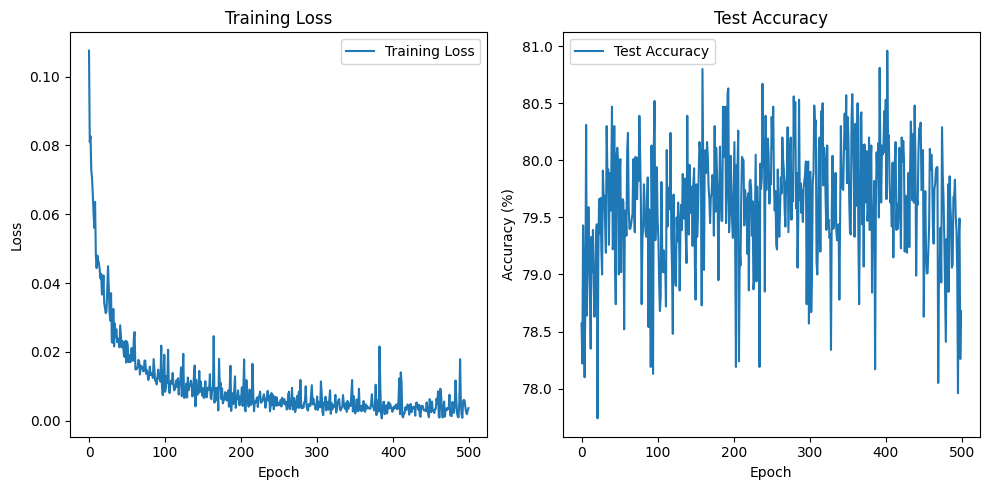

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt
import timm
import itertools

# Function to train the model
def train(model, optimizer, criterion, trainloader, device):
    model.train()
    running_loss = 0.0
    for batch_idx, (inputs, targets) in enumerate(trainloader):
        inputs, targets = inputs.to(device), targets.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    return running_loss / len(trainloader)

# Function to test the model
def test(model, criterion, testloader, device):
    model.eval()
    correct = 0
    total = 0
    running_loss = 0.0
    with torch.no_grad():
        for inputs, targets in testloader:
            inputs, targets = inputs.to(device), targets.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            _, predicted = outputs.max(1)
            total += targets.size(0)
            correct += predicted.eq(targets).sum().item()
            running_loss += loss.item()
    accuracy = 100. * correct / total
    return accuracy, running_loss / len(testloader)

# Function to train the model with best parameters for a given number of epochs and save the loss and accuracy
def train_best_model_for_epochs(best_params, best_model_state, num_epochs):
    device = 'cuda' if torch.cuda.is_available() else 'cpu'

    # Extract the best hyperparameters
    best_lr, best_momentum, best_weight_decay, best_batch_size, best_optimizer_type = best_params

    # Get data loaders for the best batch size
    trainloader, testloader = get_dataloaders(best_batch_size)

    # Initialize the model and load the best model state
    model = timm.create_model('xception', pretrained=True, num_classes=10).to(device)
    model.load_state_dict(best_model_state)  # Load the state of the best model

    criterion = nn.CrossEntropyLoss()

    # Initialize the optimizer with the best parameters
    if best_optimizer_type == 'SGD':
        optimizer = optim.SGD(model.parameters(), lr=best_lr, momentum=best_momentum, weight_decay=best_weight_decay)
    elif best_optimizer_type == 'Adam':
        optimizer = optim.Adam(model.parameters(), lr=best_lr, weight_decay=best_weight_decay)

    # To store the loss and accuracy values for plotting
    train_losses = []
    test_accuracies = []

    # Train for the specified number of epochs
    for epoch in range(num_epochs):
        train_loss = train(model, optimizer, criterion, trainloader, device)
        test_accuracy, test_loss = test(model, criterion, testloader, device)

        # Store loss and accuracy for each epoch
        train_losses.append(train_loss)
        test_accuracies.append(test_accuracy)

        print(f"Epoch {epoch+1}/{num_epochs}: train_loss={train_loss:.4f}, test_accuracy={test_accuracy:.2f}%, test_loss={test_loss:.4f}")

    # Save the final model after the specified epochs
    torch.save(model.state_dict(), f'final_cifar10_xception_{num_epochs}epochs.pth')
    print(f"Training complete. Model saved as 'final_cifar10_xception_{num_epochs}epochs.pth'")

    # Plotting the results
    plt.figure(figsize=(10, 5))

    # Plot the training loss
    plt.subplot(1, 2, 1)
    plt.plot(train_losses, label='Training Loss')
    plt.title('Training Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    # Plot the test accuracy
    plt.subplot(1, 2, 2)
    plt.plot(test_accuracies, label='Test Accuracy')
    plt.title('Test Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy (%)')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Assuming best_params and best_model_state are already found from the grid search
# You can now run this function with the chosen number of epochs, e.g., 500
train_best_model_for_epochs(best_params, best_model_state, num_epochs=500)


---

# Results & Model Performance

After training and tuning the models, performance was evaluated on the test dataset, with the following results:

- The **baseline CNN** achieved a test accuracy of **82.48%**. While this model performed well, it exhibited signs of overfitting, as the training accuracy was significantly higher than the test accuracy.
  
- **Transfer Learning using ResNet18 and Xception** resulted in varying performance. ResNet18 achieved a test accuracy of **38.13%**, while Xception performed better with a test accuracy of **74.65%**. Xception showed further improvement after hyperparameter tuning, demonstrating its potential for transfer learning tasks.

The following visualizations were used to assess model performance:
- **Accuracy and Loss Curves**: Plotted to observe the evolution of accuracy and loss during training.
- **Confusion Matrix**: (Optional if applicable) Provided insight into correct and incorrect predictions, highlighting the classes that were most challenging to distinguish.


---

---

## Conclusion

This project explored image classification on the CIFAR-10 dataset using Convolutional Neural Networks (CNNs) and transfer learning techniques. The CNN model with five convolutional layers achieved the best performance, with a test accuracy of approximately 82%. This model, enhanced with batch normalization, dropout, and global average pooling, demonstrated strong generalization despite the challenges of overfitting due to the dataset's small image size and variability.

Transfer learning using pre-trained models, such as Xception and ResNet18, was also explored. After hyperparameter tuning, the fine-tuned Xception model achieved around 80% test accuracy, showing its potential for effective feature extraction even on smaller datasets like CIFAR-10. Although the performance of ResNet18 was lower, Xception provided promising results, indicating that transfer learning can be beneficial when properly fine-tuned.

The results indicate that the optimal test accuracy for this problem with the current methods is around 80-82%. Further improvements could include experimenting with more complex data augmentation techniques, fine-tuning additional layers of the pre-trained models, and applying advanced regularization methods to prevent overfitting.

This project demonstrates the robustness of CNNs for image classification and highlights the value of transfer learning, particularly when paired with careful tuning and regularization. Additional exploration may further enhance model performance.

